# **Classifying clinically actionable genetic mutation using SVM**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from sklearn.decomposition import TruncatedSVD


from nltk.corpus import stopwords

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
# from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
# from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
!gdown --id 1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi
!gdown --id 1bSQrw5WmDqqI8hBcr8Pflzatx4xCT0Ex

C:\Users\Aditi Lal\AppData\Local\Programs\Python\Python39\lib\site-packages\gdown\cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi
To: C:\Users\Aditi Lal\Project\training_text.zip

  0%|          | 0.00/63.9M [00:00<?, ?B/s]
  1%|          | 524k/63.9M [00:00<00:13, 4.59MB/s]
  2%|2         | 1.57M/63.9M [00:00<00:10, 5.72MB/s]
  4%|4         | 2.62M/63.9M [00:00<00:09, 6.23MB/s]
  7%|6         | 4.19M/63.9M [00:00<00:07, 8.00MB/s]
  8%|8         | 5.24M/63.9M [00:00<00:06, 8.47MB/s]
 10%|9         | 6.29M/63.9M [00:00<00:06, 8.31MB/s]
 11%|#1        | 7.34M/63.9M [00:00<00:06, 8.22MB/s]
 13%|#3        | 8.39M/63.9M [00:01<00:06, 8.09MB/s]
 15%|#4        | 9.44M/63.9M [00:01<00:07, 7.54MB/s]
 17%|#7        | 11.0M/63.9M [00:01<00:05, 8.83MB/s]
 19%|#8        | 12.1M/63.9M [00:01<00:

In [2]:
data = pd.read_excel(r"C:\Users\Aditi Lal\Project\Data\dataset_fyp.xlsx")
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
print(data.head())

Number of data points :  1048575
Number of features :  25
Features :  ['Gene name' 'Gene CDS length' 'Sample name' 'ID_sample' 'ID_tumour'
 'Primary site' 'Primary histology' 'Histology subtype 1'
 'Genome-wide screen' 'GENOMIC_MUTATION_ID' 'LEGACY_MUTATION_ID'
 'MUTATION_ID' 'Mutation CDS' 'Mutation AA' 'Mutation Description'
 'Mutation genome position' 'Mutation strand' 'Resistance Mutation'
 'Mutation somatic status' 'Sample Type' 'Tumour origin' 'Age' 'Tier'
 'HGVSG' 'Class']
  Gene name  Gene CDS length      Sample name  ID_sample  ID_tumour  \
0     ERBB4            12136         PD23569a    2213156    2081286   
1     ERBB2             4545          2687074    2687074    2546056   
2       VHL             3737  TCGA-CJ-4638-01    1779968    1683967   
3      TP53             2579      BCM-CC-8410    2866116    2721193   
4      PBX1             6636              22T    2745864    2604567   

    Primary site Primary histology              Histology subtype 1  \
0         breast 

**Performance Metrics**

1.   Log loss
2.   Confusion matrix

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aditi
[nltk_data]     Lal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# merginig the datasets

Train test cv split

In [4]:
y_true = data['Class'].values
data.fillna(0, inplace=True)
data['Gene name']      = data['Gene name'].replace('\s+', '_')
data['Mutation AA']      = data['Mutation AA'].replace('\s+', '_')
data['Age']      = data['Age'].replace('\s+', '_')
data['Primary histology']      = data['Primary histology'].replace('\s+', '_')
data['Primary site']      = data['Primary site'].replace('\s+', '_')


# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [5]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 671088
Number of data points in test data: 209715
Number of data points in cross validation data: 167772


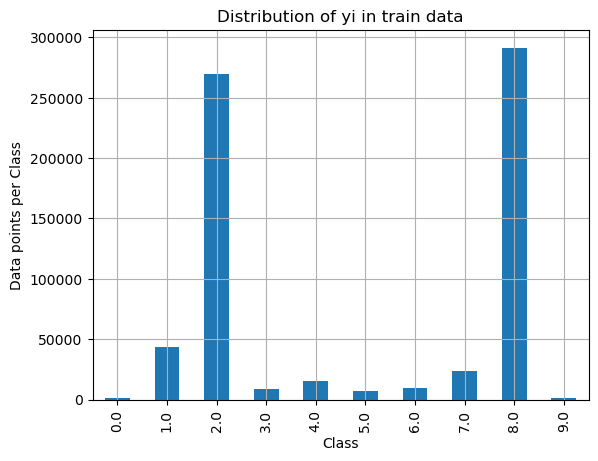

Number of data points in class 9 : 291467 ( 43.432 %)
Number of data points in class 3 : 269243 ( 40.12 %)
Number of data points in class 2 : 43253 ( 6.445 %)
Number of data points in class 8 : 23319 ( 3.475 %)
Number of data points in class 5 : 15452 ( 2.303 %)
Number of data points in class 7 : 9931 ( 1.48 %)
Number of data points in class 4 : 8988 ( 1.339 %)
Number of data points in class 6 : 6820 ( 1.016 %)
Number of data points in class 10 : 1348 ( 0.201 %)
Number of data points in class 1 : 1267 ( 0.189 %)
--------------------------------------------------------------------------------


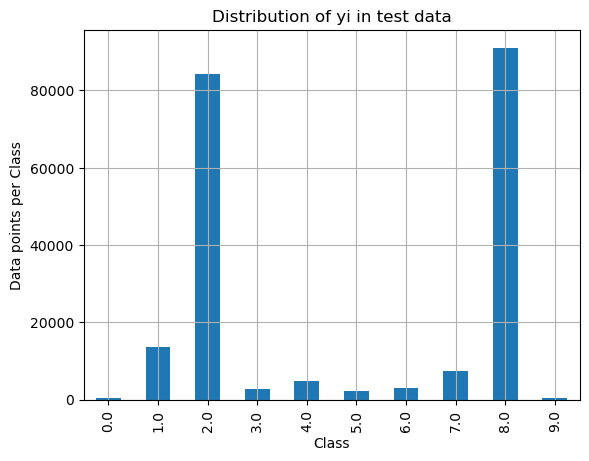

Number of data points in class 9 : 91084 ( 43.432 %)
Number of data points in class 3 : 84139 ( 40.121 %)
Number of data points in class 2 : 13516 ( 6.445 %)
Number of data points in class 8 : 7287 ( 3.475 %)
Number of data points in class 5 : 4829 ( 2.303 %)
Number of data points in class 7 : 3103 ( 1.48 %)
Number of data points in class 4 : 2809 ( 1.339 %)
Number of data points in class 6 : 2131 ( 1.016 %)
Number of data points in class 10 : 421 ( 0.201 %)
Number of data points in class 1 : 396 ( 0.189 %)
--------------------------------------------------------------------------------


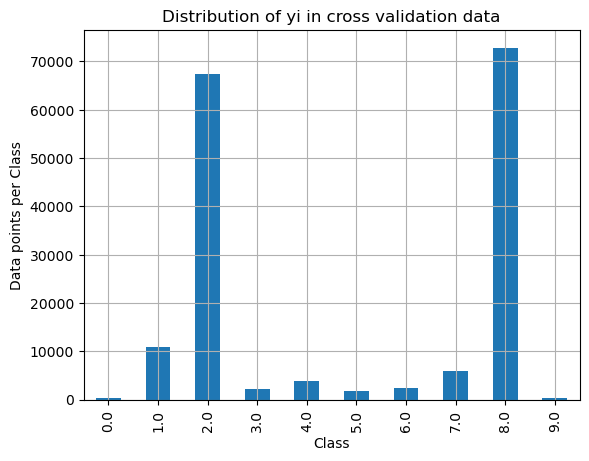

Number of data points in class 9 : 72867 ( 43.432 %)
Number of data points in class 3 : 67310 ( 40.12 %)
Number of data points in class 2 : 10813 ( 6.445 %)
Number of data points in class 8 : 5830 ( 3.475 %)
Number of data points in class 5 : 3863 ( 2.303 %)
Number of data points in class 7 : 2483 ( 1.48 %)
Number of data points in class 4 : 2247 ( 1.339 %)
Number of data points in class 6 : 1705 ( 1.016 %)
Number of data points in class 10 : 337 ( 0.201 %)
Number of data points in class 1 : 317 ( 0.189 %)


In [6]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

In [7]:
# This function plots the confusion matrices given y_i, y_i_hat (9X9).
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    
    B =(C/C.sum(axis=0))

    
    labels = [1,2,3,4,5,6,7,8,9]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# **RANDOM MODEL**

Log loss on Cross Validation Data using Random Model 2.480908828689019
Log loss on Test Data using Random Model 2.482760598802495
-------------------- Confusion matrix --------------------


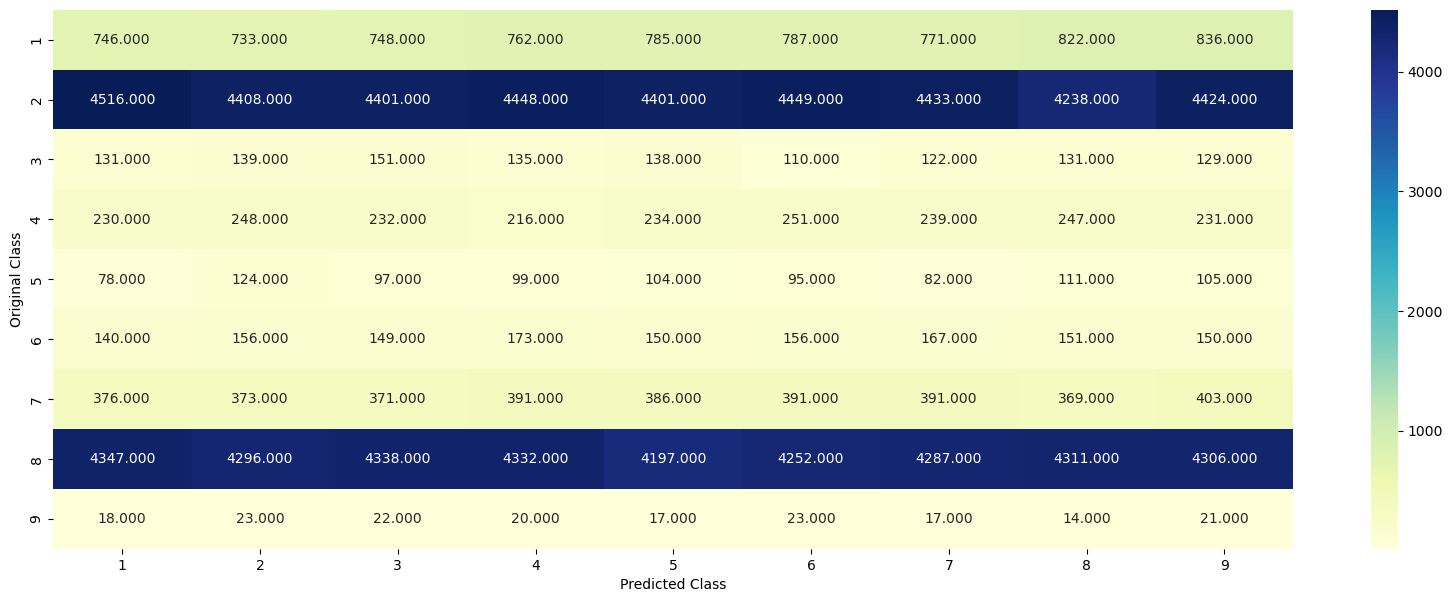

-------------------- Precision matrix (Columm Sum=1) --------------------


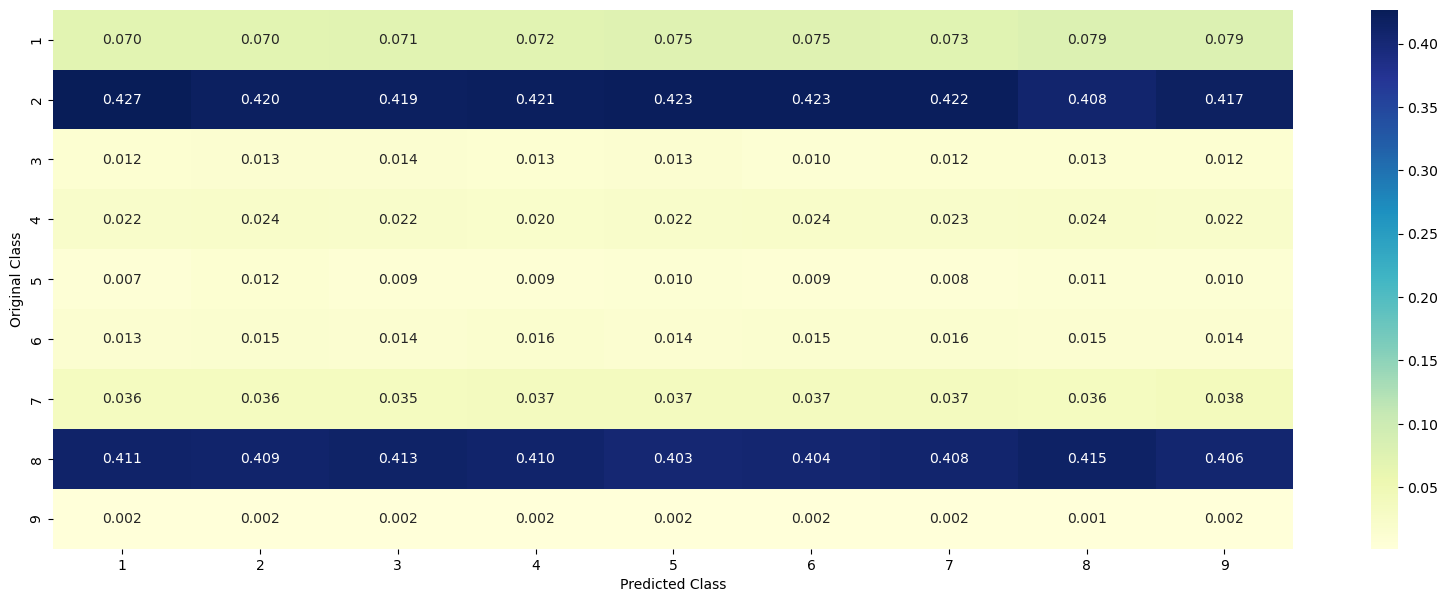

-------------------- Recall matrix (Row sum=1) --------------------


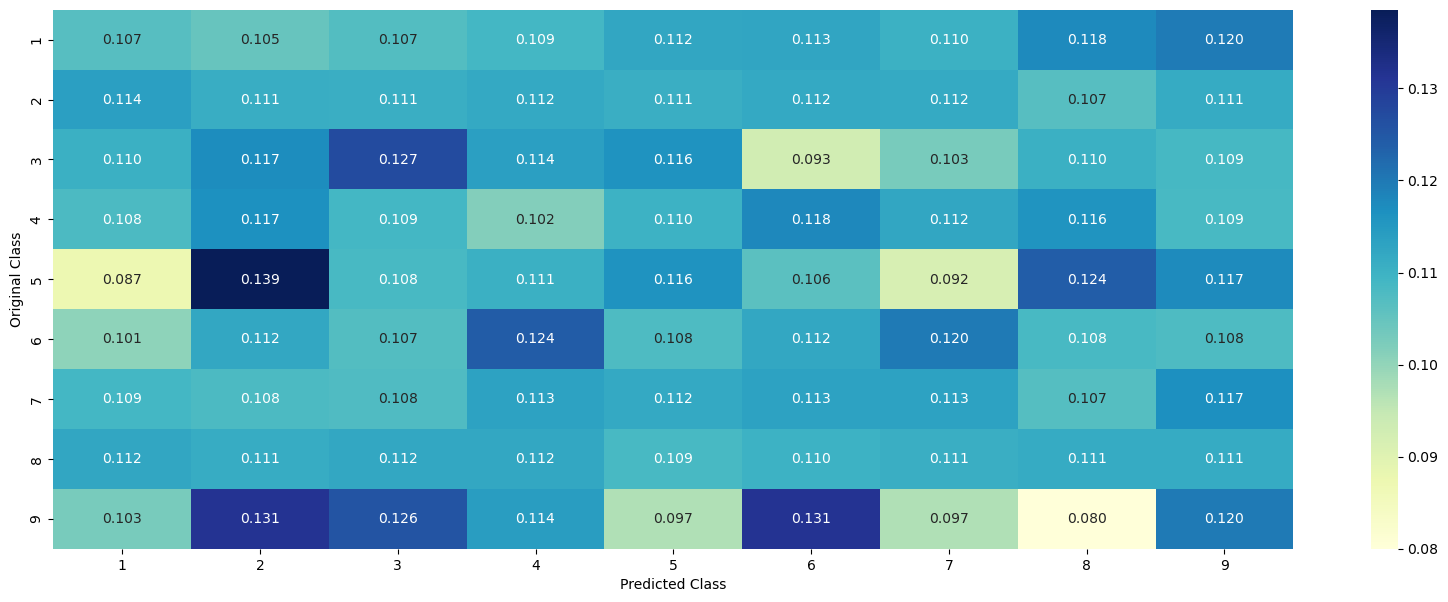

In [22]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

UNIVARIATE ANALYSIS of all features by using one hot encoding and response encoding

In [8]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'

def get_gv_fea_dict(alpha, feature, df):

    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in that particular class data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [9]:
unique_genes = train_df['Gene name'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 723
BRAF       22297
TP53       21462
JAK2       20281
KRAS       18372
LRP1B      13893
EGFR       13381
CNTNAP2    12144
CSMD3      11090
ROBO2       8847
PTPRD       8469
Name: Gene name, dtype: int64


In [10]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 723 different categories of genes in the train data, and they are distibuted as follows


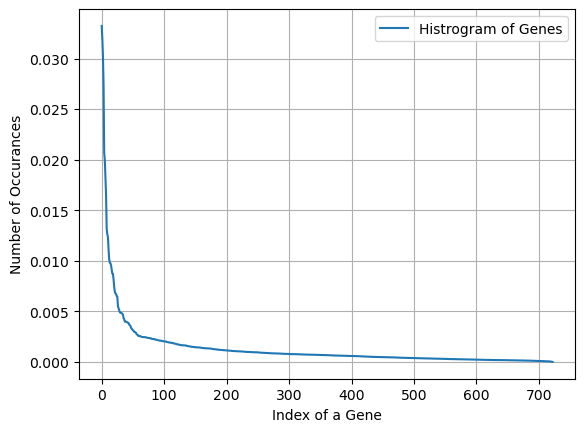

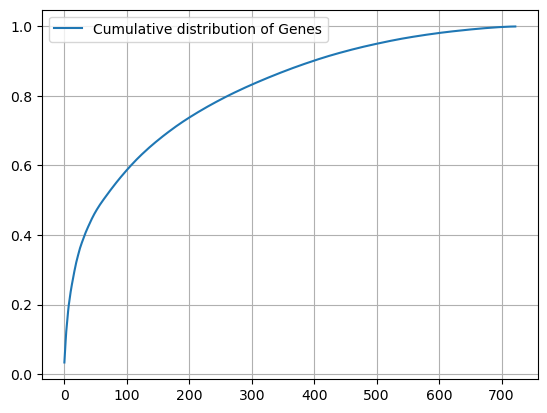

In [11]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

In [12]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene name", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene name", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene name", cv_df))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Aditi Lal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\TEMP\ipykernel_30488\2192352905.py", line 5, in <module>
    train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene name", train_df))
  File "C:\TEMP\ipykernel_30488\1307634160.py", line 68, in get_gv_feature
    if row[feature] in dict(value_count).keys():
  File "C:\Users\Aditi Lal\anaconda3\lib\site-packages\pandas\core\series.py", line 958, in __getitem__
    return self._get_value(key)
  File "C:\Users\Aditi Lal\anaconda3\lib\site-packages\pandas\core\series.py", line 1069, in _get_value
    loc = self.index.get_loc(label)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aditi Lal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtrac

TypeError: object of type 'NoneType' has no len()

In [ ]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

In [13]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene name'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene name'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene name'])

In [14]:
train_df['Gene name'].head()

14163     CNTNAP2
814211    CNTNAP2
431983       JAK2
447602       PAX3
891359       TFRC
Name: Gene name, dtype: object

In [15]:
gene_vectorizer.get_feature_names()

['a1cf',
 'abi1',
 'abl1',
 'abl2',
 'ackr3',
 'acsl3',
 'acsl6',
 'acvr1',
 'acvr1b',
 'acvr2a',
 'afdn',
 'aff1',
 'aff3',
 'aff4',
 'akap9',
 'akt1',
 'akt2',
 'akt3',
 'aldh2',
 'alk',
 'amer1',
 'ank1',
 'apc',
 'apobec3b',
 'ar',
 'araf',
 'arhgap26',
 'arhgap35',
 'arhgap5',
 'arhgef10',
 'arhgef10l',
 'arhgef12',
 'arid1a',
 'arid1b',
 'arid2',
 'arnt',
 'aspscr1',
 'asxl1',
 'asxl2',
 'atf1',
 'atic',
 'atm',
 'atp1a1',
 'atp2b3',
 'atr',
 'atrx',
 'axin1',
 'axin2',
 'b2m',
 'bap1',
 'bard1',
 'bax',
 'baz1a',
 'bcl10',
 'bcl11a',
 'bcl11b',
 'bcl2',
 'bcl2l12',
 'bcl3',
 'bcl6',
 'bcl7a',
 'bcl9',
 'bcl9l',
 'bclaf1',
 'bcor',
 'bcorl1',
 'bcr',
 'birc3',
 'birc6',
 'blm',
 'bmp5',
 'bmpr1a',
 'braf',
 'brca1',
 'brca2',
 'brd3',
 'brd4',
 'brip1',
 'btg1',
 'btg2',
 'btk',
 'bub1b',
 'c15orf65',
 'cacna1d',
 'calr',
 'camta1',
 'cant1',
 'card11',
 'cars',
 'casp3',
 'casp8',
 'casp9',
 'cbfa2t3',
 'cbfb',
 'cbl',
 'cblb',
 'cblc',
 'ccdc6',
 'ccnb1ip1',
 'ccnc',
 'ccnd1',


In [16]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (671088, 723)


For values of alpha =  1e-05 The log loss is: 1.2683488300743293
For values of alpha =  0.0001 The log loss is: 1.268633177473737
For values of alpha =  0.001 The log loss is: 1.2738712107984038
For values of alpha =  0.01 The log loss is: 1.281590141186668
For values of alpha =  0.1 The log loss is: 1.2842208025051076
For values of alpha =  1 The log loss is: 1.2847384281049037


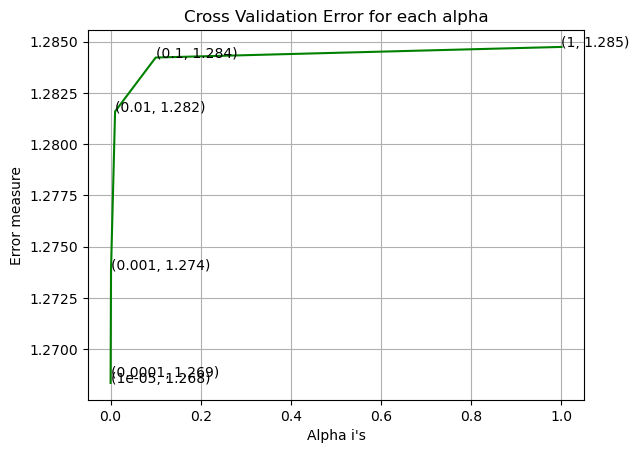

For values of best alpha =  1e-05 The train log loss is: 1.2636809380218794
For values of best alpha =  1e-05 The cross validation log loss is: 1.2683488300743293
For values of best alpha =  1e-05 The test log loss is: 1.2678299471084868


In [17]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])
# predict(X)	Predict class labels for samples in X.
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [18]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene name'].isin(list(set(train_df['Gene name'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene name'].isin(list(set(train_df['Gene name'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  723  genes in train dataset?
Ans
1. In test data 209715 out of 209715 : 100.0
2. In cross validation data 167772 out of  167772 : 100.0


# **Variation Feature**

In [19]:
unique_variations = train_df['Mutation AA'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 133740
p.?                  290598
p.V600E               19731
p.V617F               18305
p.G12D                 6519
p.(Q569_E648)ins?      4666
p.G12V                 4431
p.L858R                3982
p.R132H                3104
p.(729_761)del?        2955
p.G13D                 2549
Name: Mutation AA, dtype: int64


In [20]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 133740 different categories of variations in the train data, and they are distibuted as follows


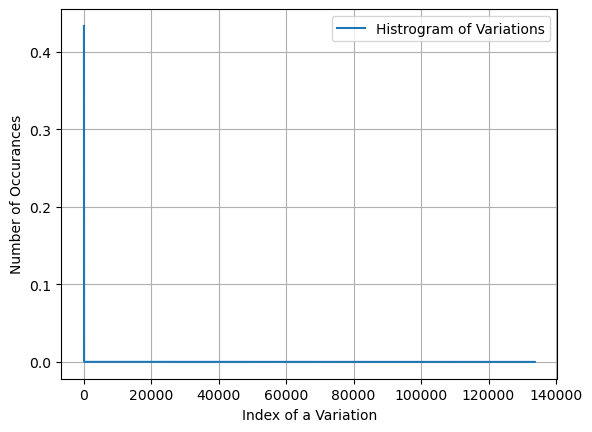

[0.43302518 0.46242669 0.48970329 ... 0.99999702 0.99999851 1.        ]


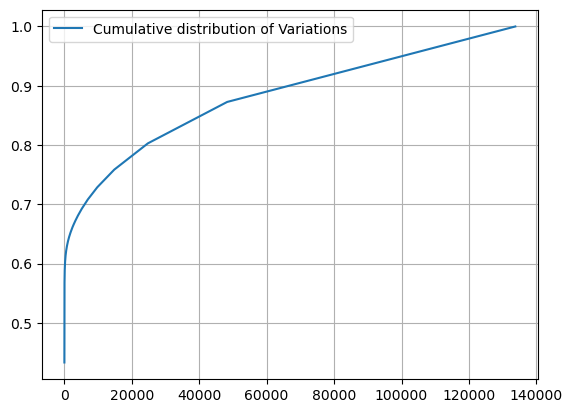

In [22]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

In [23]:
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Mutation AA'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Mutation AA'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Mutation AA'])

In [24]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (671088, 129479)


For values of alpha =  1e-05 The log loss is: 1.28673777288146
For values of alpha =  0.0001 The log loss is: 1.2920318873680228
For values of alpha =  0.001 The log loss is: 1.2951190866106153
For values of alpha =  0.01 The log loss is: 1.2963703346553581
For values of alpha =  0.1 The log loss is: 1.2967500345967207
For values of alpha =  1 The log loss is: 1.2969627127655412


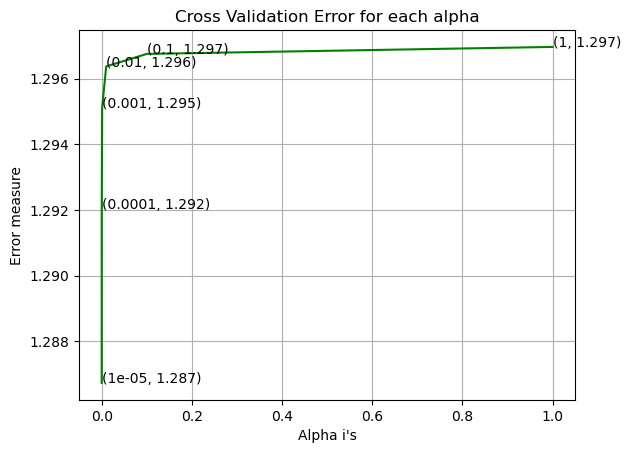

For values of best alpha =  1e-05 The train log loss is: 1.2605449567723908
For values of best alpha =  1e-05 The cross validation log loss is: 1.28673777288146
For values of best alpha =  1e-05 The test log loss is: 1.286785004394065


In [25]:
alpha = [10 ** x for x in range(-5, 1)]



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [26]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Mutation AA'].isin(list(set(train_df['Mutation AA'])))].shape[0]
cv_coverage=cv_df[cv_df['Mutation AA'].isin(list(set(train_df['Mutation AA'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  133740  genes in test and cross validation data sets?
Ans
1. In test data 182925 out of 209715 : 87.22552034904514
2. In cross validation data 146167 out of  167772 : 87.1224042152445


In [27]:
unique_variations = train_df['Primary histology'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))


Number of Unique Variations : 126
carcinoma                     453567
haematopoietic_neoplasm        49118
lymphoid_neoplasm              47290
malignant_melanoma             36525
other                          18537
meningioma                     14528
glioma                         13408
haemangioblastoma               5776
NS                              5720
carcinoid-endocrine_tumour      3649
Name: Primary histology, dtype: int64


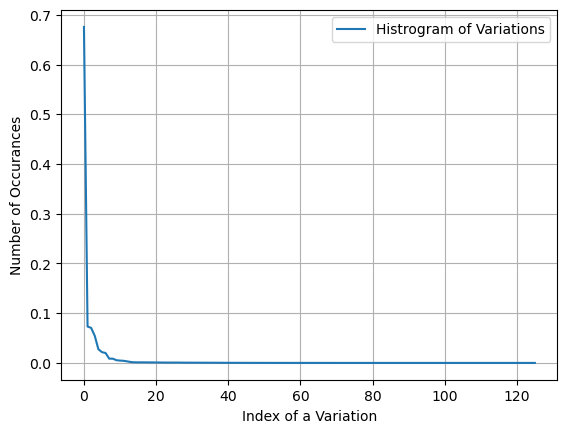

[0.67586814 0.74905974 0.81952739 0.87395394 0.90157625 0.92322467
 0.94320417 0.95181109 0.96033456 0.965772   0.97047034 0.97472016
 0.97782556 0.97959731 0.98081921 0.98199938 0.9831721  0.98426883
 0.98531638 0.98631625 0.98723565 0.98806863 0.98883902 0.98955875
 0.99027251 0.99096095 0.99163895 0.99225437 0.99280571 0.99332725
 0.99383538 0.99428689 0.99472498 0.99513477 0.99552667 0.99589175
 0.99624639 0.99657869 0.99687224 0.99711513 0.9973163  0.99751746
 0.99771863 0.99789446 0.99803304 0.99816418 0.99829233 0.9984175
 0.99853819 0.99864399 0.99873489 0.99881983 0.99889135 0.99896288
 0.99902397 0.99908507 0.9991402  0.99919534 0.99924749 0.99929964
 0.99934584 0.99939054 0.99943525 0.99947846 0.99952167 0.99955744
 0.99959171 0.99962002 0.99964684 0.99967068 0.99969453 0.99971688
 0.99973625 0.99975264 0.99976903 0.99978393 0.99979585 0.99980777
 0.99981821 0.99982715 0.99983609 0.99984503 0.99985248 0.99985993
 0.99986738 0.99987483 0.99988079 0.99988675 0.99989271 0.99989

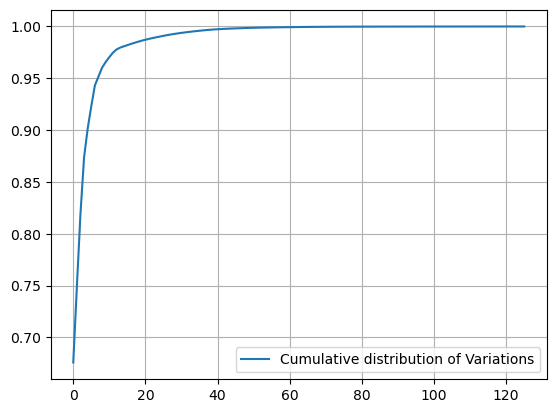

In [28]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

In [29]:
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Primary histology'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Primary histology'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Primary histology'])
#Cell5
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (671088, 144)


For values of alpha =  1e-05 The log loss is: 1.286341667586672
For values of alpha =  0.0001 The log loss is: 1.2863330674964564
For values of alpha =  0.001 The log loss is: 1.2879186440417199
For values of alpha =  0.01 The log loss is: 1.2905125014202554
For values of alpha =  0.1 The log loss is: 1.296387154895469
For values of alpha =  1 The log loss is: 1.2989348376605785


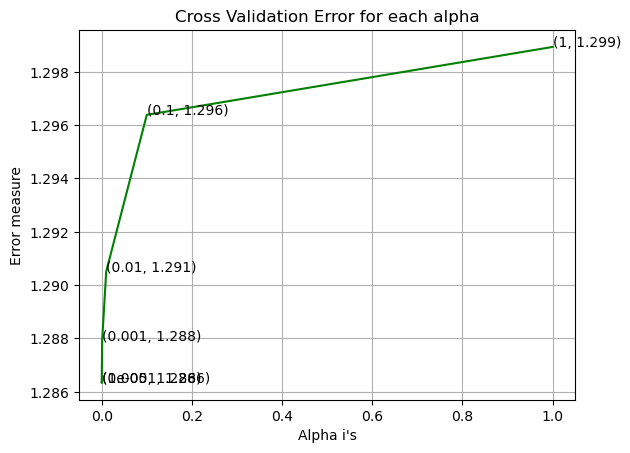

For values of best alpha =  0.0001 The train log loss is: 1.2858773392581089
For values of best alpha =  0.0001 The cross validation log loss is: 1.2863330674964564
For values of best alpha =  0.0001 The test log loss is: 1.2859694292174573
Q12. How many data points are covered by total  126  histology in test and cross validation data sets?
Ans
1. In test data 209710 out of 209715 : 99.99761581193525
2. In cross validation data 167770 out of  167772 : 99.99880790596762


In [30]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#Cell7
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " histology in test and cross validation data sets?")
test_coverage=test_df[test_df['Primary histology'].isin(list(set(train_df['Primary histology'])))].shape[0]
cv_coverage=cv_df[cv_df['Primary histology'].isin(list(set(train_df['Primary histology'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Number of Unique Variations : 1258
0.0     357927
67.0     10489
69.0      9012
70.0      8838
66.0      8567
60.0      8454
62.0      8371
61.0      8318
65.0      8217
64.0      8161
Name: Age, dtype: int64
Ans: There are 1258 different categories of variations in the train data, and they are distibuted as follows


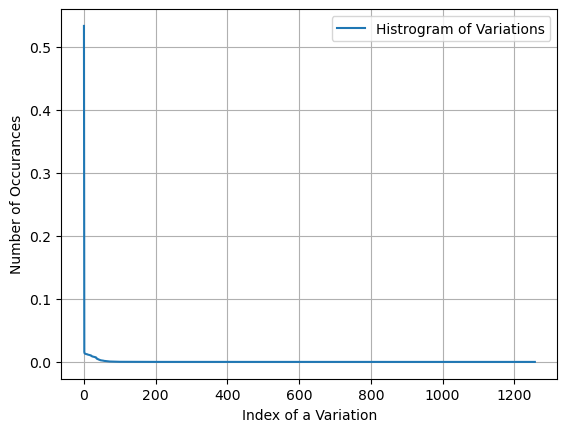

[0.5333533  0.54898314 0.56241208 ... 0.99999702 0.99999851 1.        ]


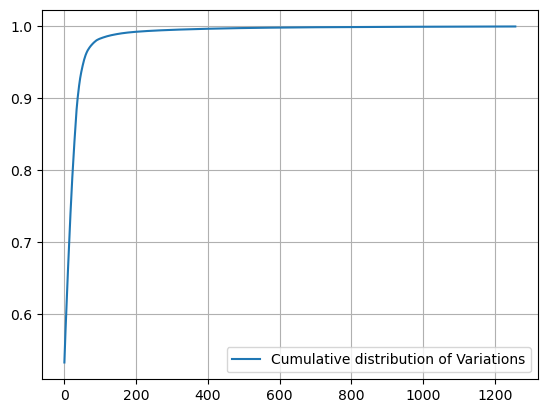

AttributeError: 'int' object has no attribute 'lower'

In [33]:
#Cell1
unique_variations = train_df['Age'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))
#Cell2
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)
#Cell3
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
cv_df['Age'] = cv_df['Age'].astype(int)

variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Age'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Age'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Age'])
#Cell5
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)
#Cell6
alpha = [10 ** x for x in range(-5, 1)]



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#Cell7
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Age'].isin(list(set(train_df['Age'])))].shape[0]
cv_coverage=cv_df[cv_df['Age'].isin(list(set(train_df['Age'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Number of Unique Variations : 45
haematopoietic_and_lymphoid_tissue    96667
large_intestine                       69706
liver                                 59172
skin                                  50434
breast                                50323
lung                                  48501
pancreas                              37351
prostate                              34375
oesophagus                            30054
stomach                               24441
Name: Primary site, dtype: int64
Ans: There are 45 different categories of variations in the train data, and they are distibuted as follows


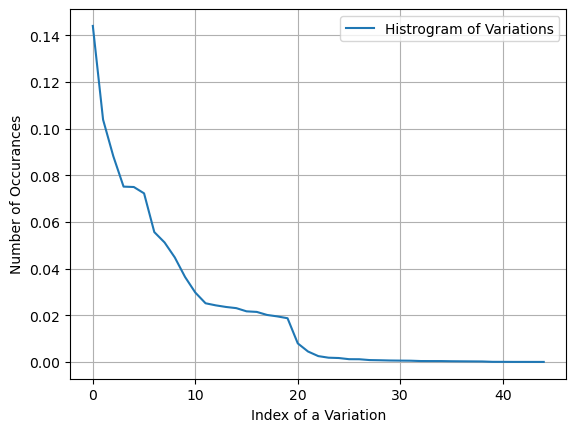

[0.14404519 0.24791533 0.33608856 0.41124115 0.48622833 0.55850052
 0.6141579  0.6653807  0.71016469 0.74658465 0.77632591 0.80147164
 0.82572181 0.84928206 0.87234163 0.89403029 0.91547159 0.935615
 0.95513703 0.9738693  0.9818161  0.98628049 0.98877643 0.99059289
 0.99226629 0.99344348 0.99459683 0.99539554 0.99611675 0.99673217
 0.99729842 0.99782294 0.99820292 0.998568   0.99892861 0.99922216
 0.99947846 0.99970347 0.99989867 0.99993891 0.99997169 0.99998212
 0.99999255 0.99999702 1.        ]


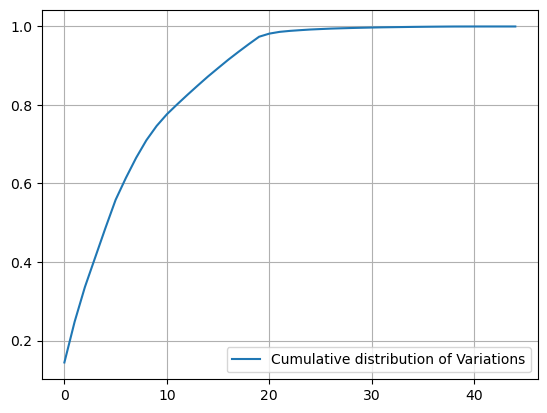

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (671088, 46)
For values of alpha =  1e-05 The log loss is: 1.2589594583528565
For values of alpha =  0.0001 The log loss is: 1.2587584633001114
For values of alpha =  0.001 The log loss is: 1.2609897490172743
For values of alpha =  0.01 The log loss is: 1.266543505111913
For values of alpha =  0.1 The log loss is: 1.270877387897543
For values of alpha =  1 The log loss is: 1.272260737201971


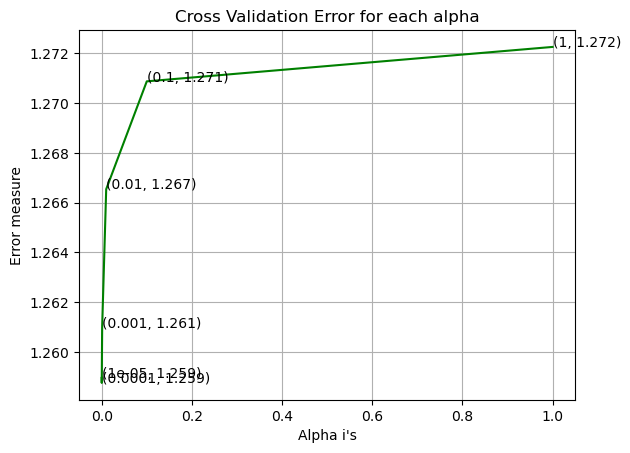

For values of best alpha =  0.0001 The train log loss is: 1.2582740827193477
For values of best alpha =  0.0001 The cross validation log loss is: 1.2587584633001114
For values of best alpha =  0.0001 The test log loss is: 1.2575987171974785
Q12. How many data points are covered by total  45  genes in test and cross validation data sets?
Ans
1. In test data 209715 out of 209715 : 100.0
2. In cross validation data 167772 out of  167772 : 100.0


In [32]:
#Cell1
unique_variations = train_df['Primary site'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))
#Cell2
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)
#Cell3
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Primary site'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Primary site'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Primary site'])
#Cell5
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)
#Cell6
alpha = [10 ** x for x in range(-5, 1)]



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#Cell7
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Primary site'].isin(list(set(train_df['Primary site'])))].shape[0]
cv_coverage=cv_df[cv_df['Primary site'].isin(list(set(train_df['Primary site'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

# **Text feature**

# **Data preparation for ML models.**

In [ ]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [ ]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [ ]:
train_x_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding)).tocsr()
test_x_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding)).tocsr()
cv_x_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding)).tocsr()

train_y = np.array(list(train_df['Class'])).reshape(-1, 1).ravel()
test_y = np.array(list(test_df['Class'])).reshape(-1, 1).ravel()
cv_y = np.array(list(cv_df['Class'])).reshape(-1, 1).ravel()


In [ ]:

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding))

***KNN***

In [ ]:
train_y = np.array(list(train_df['Class'])).reshape(-1, 1)
test_y = np.array(list(test_df['Class'])).reshape(-1, 1)
cv_y = np.array(list(cv_df['Class'])).reshape(-1, 1)
train_y = np.ravel(train_y)
test_y=np.ravel(test_y)
cv_y=np.ravel(cv_y)

print(train_y.shape)
train_df

In [ ]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotCoding,train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [ ]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create the classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training data
knn.fit(train_x_onehotCoding, train_y)

# predict on the test data
KNNclass1 = knn.predict(test_x_onehotCoding)

# evaluate the accuracy of the model on the test data
accuracy = knn.score(test_x_onehotCoding, test_y)

print("Accuracy:", accuracy)

***Linear SVM***

In [ ]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)



In [ ]:
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [ ]:
from sklearn.svm import SVC

# create SVM classifier with linear kernel
svm = SVC(kernel='linear')

# train the model
svm.fit(train_x_onehotCoding, train_y)

# predict on the test set
svm_pred = svm.predict(test_x_onehotCoding)

# calculate accuracy score
svm_score = accuracy_score(test_y, svm_pred)
print('SVM accuracy:', svm_score)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
clf.fit(train_x_onehotCoding, train_y)

# Predict the probabilities for the validation data
pred_probs = clf.predict_proba(cv_x_onehotCoding)

# Calculate the log loss for the validation data
logloss = log_loss(cv_y, pred_probs)

print(f"Log loss on validation data: {logloss}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(train_x_onehotCoding, train_y)

# Predict on the test data
y_pred_rf = rf_clf.predict_proba(test_x_onehotCoding)

# Calculate the log loss
log_loss_rf = log_loss(test_y, y_pred_rf, eps=1e-15)
print("Accuracy on training set: {:.3f}".format(rf_clf.score(train_x_onehotCoding, train_y)))



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

a="TP53"
b="Truncating Mutations"
data = [[a, b]]
n1 = pd.DataFrame(data)
n2 = n1.select_dtypes(include=["object"])
n3 = n1.select_dtypes(include=["integer", "float"])
label = LabelEncoder()
n4 = n2.apply(label.fit_transform)
n4 = n4.join(n3)
print(n4.head())
new_input = n4.values
new_output = rf_clf.predict(new_input)
print(new_output)